In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/yijun/Documents/NYU/1007/hw/project/train.csv')
info = pd.read_csv("/Users/yijun/Documents/NYU/1007/hw/project/asset_details.csv")
df['timestamp']

0           1514764860
1           1514764860
2           1514764860
3           1514764860
4           1514764860
               ...    
24236801    1632182400
24236802    1632182400
24236803    1632182400
24236804    1632182400
24236805    1632182400
Name: timestamp, Length: 24236806, dtype: int64

In [46]:
#Cryptocurrency Weight Distribution
info_s=info.sort_values("Weight")
fig_index=px.bar(info_s,x="Asset_Name" , y="Weight")
fig_index.show()

In [11]:
df_bitcoin=df[df['Asset_ID']==2]

[Text(0.5, 1.0, 'VWAP'), Text(0.5, 0, 'time'), Text(0, 0.5, 'value')]

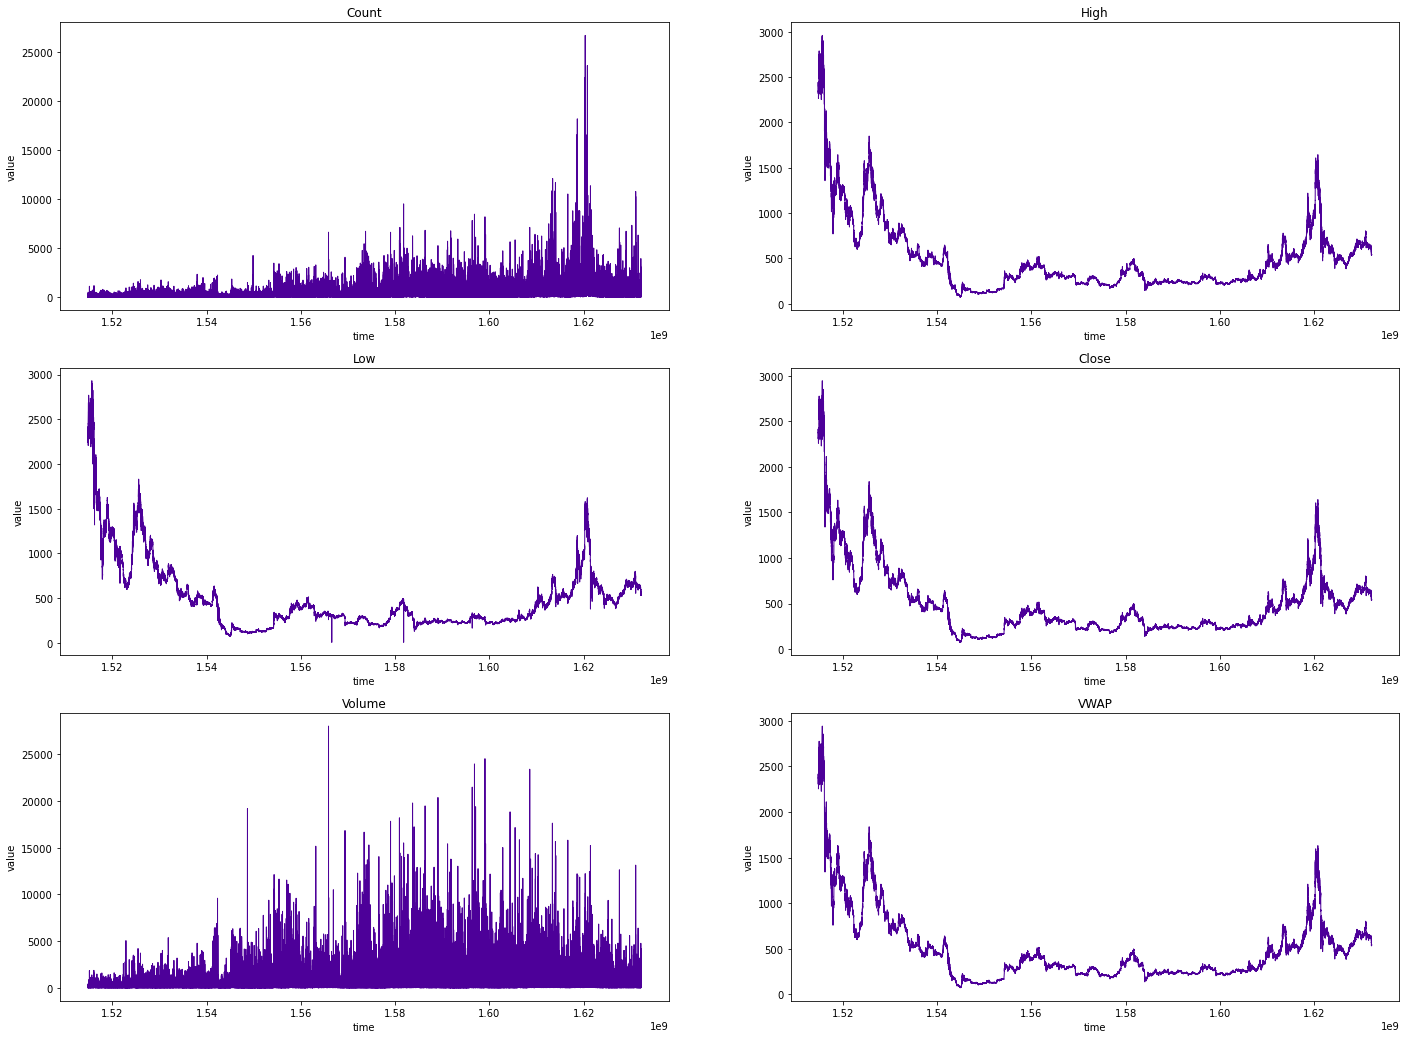

In [32]:
#original time series plots of all of the features
f, axes = plt.subplots(nrows=3, ncols=2,figsize = [24, 18])
x=df_bitcoin['timestamp']
y=df_bitcoin['Count']

axes[0,0].plot(x, y, color = [0.3,0,0.6], linewidth = 1)
axes[0,0].set(title='Count', xlabel='time', ylabel='value')

y=df_bitcoin['High']
axes[0,1].plot(x, y, color = [0.3,0,0.6], linewidth = 1)
axes[0,1].set(title='High', xlabel='time', ylabel='value')

y=df_bitcoin['Low']
axes[1,0].plot(x, y, color = [0.3,0,0.6], linewidth = 1)
axes[1,0].set(title='Low', xlabel='time', ylabel='value')

y=df_bitcoin['Close']
axes[1,1].plot(x, y, color = [0.3,0,0.6], linewidth = 1)
axes[1,1].set(title='Close', xlabel='time', ylabel='value')

y=df_bitcoin['Volume']
axes[2,0].plot(x, y, color = [0.3,0,0.6], linewidth = 1)
axes[2,0].set(title='Volume', xlabel='time', ylabel='value')

y=df_bitcoin['VWAP']
axes[2,1].plot(x, y, color = [0.3,0,0.6], linewidth = 1)
axes[2,1].set(title='VWAP', xlabel='time', ylabel='value')


In [18]:
bitcion = df[df["Asset_ID"]==2].set_index("timestamp")

In [19]:
bitcion

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,2,40.0,2376.580000,2399.50,2357.14,2374.590000,19.233005,2373.116392,-0.004218
1514764920,2,53.0,2374.553333,2400.90,2354.20,2372.286667,24.050259,2371.434498,-0.004079
1514764980,2,61.0,2371.633333,2401.90,2353.70,2372.063333,42.676438,2375.442755,-0.002892
1514765040,2,95.0,2376.060000,2406.40,2344.00,2370.566667,37.820918,2371.096152,-0.003718
1514765100,2,33.0,2372.656667,2404.60,2343.40,2370.173333,8.519679,2370.345730,-0.002171
...,...,...,...,...,...,...,...,...,...
1632182160,2,88.0,543.044000,543.19,541.01,541.902000,106.161073,542.316880,NaN
1632182220,2,178.0,540.526000,541.05,538.09,538.690000,124.443244,539.361180,NaN
1632182280,2,100.0,538.640000,539.24,538.00,538.775000,49.333529,538.611258,NaN


In [20]:
beg_btc = bitcion.index[0].astype('datetime64[s]')
end_btc = bitcion.index[-1].astype('datetime64[s]')
print('Bitcoin data goes from ', beg_btc, 'to ', end_btc)


Bitcoin data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00


In [21]:
bitcion.index

Int64Index([1514764860, 1514764920, 1514764980, 1514765040, 1514765100,
            1514765160, 1514765220, 1514765280, 1514765340, 1514765400,
            ...
            1632181860, 1632181920, 1632181980, 1632182040, 1632182100,
            1632182160, 1632182220, 1632182280, 1632182340, 1632182400],
           dtype='int64', name='timestamp', length=1953537)

In [22]:
#Missing asset data, for a given minute, is not represented by NaN's, but instead by the absence of those rows. We can check the timestamp difference between consecutive rows to see if there is missing data.
(bitcion.index[1:]-bitcion.index[:-1]).value_counts().head()

60     1951034
120       2176
180        196
240         45
300         29
Name: timestamp, dtype: int64

In [23]:
# deal with missing data: To fill the gaps, we can use the .reindex() method for forward filling, filling gaps with the previous valid value.

bitcion = bitcion.reindex(range(bitcion.index[0],bitcion.index[-1]+60,60),method='pad')
#check if there is any missing value
(bitcion.index[1:]-bitcion.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

Text(0, 0.5, 'value')

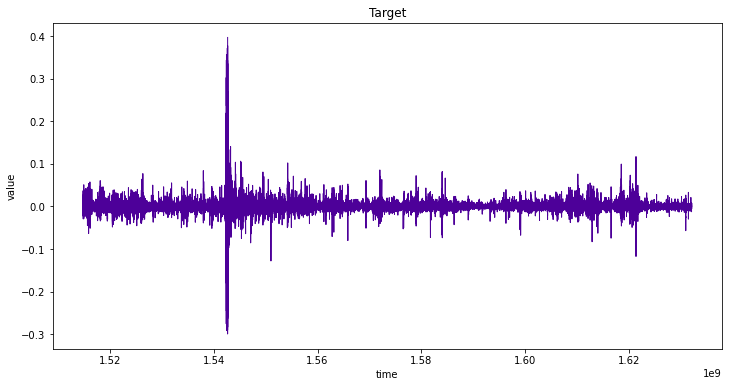

In [33]:
# plot reconstructed(without missing data) Target data(Residual log-returns for the asset over a 15 minute horizon)
f, axes = plt.subplots(nrows=1, ncols=1,figsize = [12, 6])
x=bitcion.index
y=bitcion['Target']
plt.plot(x, y, color = [0.3,0,0.6], linewidth = 1)
plt.title('Target')
plt.xlabel('time')
plt.ylabel('value')

In [43]:
#Seasonal decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df=bitcion.Close, model='multiplicable', period=12)

In [40]:
#Seasonal decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams["figure.figsize"]=(15,7)

def season_df(data, label):
    dff=data.close.resample("M").mean()
    seasonal_decompose(dff.Close).plot()
    print(label)
    return plt.show()

season_df(data=bitcion.Close, label="BTC Seasonal Decomposition")

AttributeError: 'Series' object has no attribute 'close'

In [36]:
bitcion.Close

timestamp
1514764860    2374.590000
1514764920    2372.286667
1514764980    2372.063333
1514765040    2370.566667
1514765100    2370.173333
                 ...     
1632182160     541.902000
1632182220     538.690000
1632182280     538.775000
1632182340     542.512500
1632182400     541.045000
Name: Close, Length: 1956960, dtype: float64